# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Aplikasi ini bertujuan untuk mendapatkan data dari halaman web IMDB dalam bentuk html kemudian diubah dalam bentuk DataFrame untuk untuk dilakukan proses analisis data. Data yang diambil dari website IMDB dalam kurun tahun 2019 berjumlah 50 film. Atribut data yang didapatkan adalah Judul Film, Rating IMDB, Metascore, dan Jumlah Votes.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [8]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [9]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [10]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [11]:
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
  

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [31]:
all_film = soup.find_all('div', attrs={'class':'lister-item mode-advanced'})

Do the scrapping process here (please change this markdown with your explanation)

In [63]:
import numpy as np

In [68]:
temp = [] #initiating a tuple

for film in all_film:
    #scrapping process
    title = film.find_all('a')[1].text.strip()
    
    imdb_rating = film.find_all('strong')[0].text.strip()
    
    extract_metascore = film.find_all('span', attrs={'class':'metascore favorable'})
    if not extract_metascore:
        metascore = np.nan
    else:
        metascore = extract_metascore[0].text.strip()
        
    votes = film.find_all('span', attrs={'name':'nv'})[0].text.strip()
    
    temp.append((title, imdb_rating, metascore, votes))
temp 

[('The Mandalorian', '8.8', nan, '295,531'),
 ('For All Mankind', '7.7', nan, '13,682'),
 ('The Boys', '8.7', nan, '250,888'),
 ('Avengers: Endgame', '8.4', '78', '825,830'),
 ('The Witcher', '8.2', nan, '302,902'),
 ('Servant', '7.6', nan, '20,130'),
 ('Captain Marvel', '6.9', '64', '451,637'),
 ('Sound of Metal', '7.8', '82', '36,512'),
 ('Euphoria', '8.4', nan, '66,101'),
 ('Gisaengchung', '8.6', '96', '569,950'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '561,239'),
 ('Batwoman', '3.4', nan, '32,753'),
 ('The Bay', '7.0', nan, '4,147'),
 ('Knives Out', '7.9', '82', '466,913'),
 ('Sex Education', '8.3', nan, '160,056'),
 ('The Gentlemen', '7.8', nan, '247,306'),
 ('ZeroZeroZero', '8.2', nan, '15,066'),
 ('Joker', '8.4', nan, '956,140'),
 ('Capitani', '6.7', nan, '1,840'),
 ('Virgin River', '7.5', nan, '20,492'),
 ('Chernobyl', '9.4', nan, '547,495'),
 ('The Morning Show', '8.4', nan, '52,930'),
 ('Midsommar', '7.1', '72', '205,710'),
 ('Prodigal Son', '7.7', nan, '13,261'),

## Creating data frame & Data wrangling

Put the array into dataframe

In [95]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('title', 'imdb_rating', 'metascore', 'votes'))
df.head()

title imdb_rating metascore    votes
0    The Mandalorian         8.8       NaN  295,531
1    For All Mankind         7.7       NaN   13,682
2           The Boys         8.7       NaN  250,888
3  Avengers: Endgame         8.4        78  825,830
4        The Witcher         8.2       NaN  302,902

Do the data cleaning here

Proses data cleaning yang dilakukan yang pertama adalah mengubah tipe data dari kolom imdb_ratin dan metascore menjadi tipe data float64 sehingga dapat dilakukan perhitungan. Lalu, pada kolom votes dilakukan penghilangan tanda koma dan pengubahan tipe data ke int64 agar dapat dilakukan perhitungan. Kemudian pada kolom metascore nilai NaN diisi dengan nilai mean dari metascore. Terakhir karena dilakukan pengubahan tipe data metascore menjadi int64 menyesuaikan dengan nilai dari metascore itu sendiri.

In [96]:
df[['imdb_rating','metascore']] = df[['imdb_rating','metascore']].astype('float64')

In [97]:
df['votes'] = df['votes'].str.replace(",", "")
df['votes'] = df['votes'].astype('int64')

In [102]:
df['metascore'].fillna(df['metascore'].mean(), inplace = True)

In [104]:
df['metascore'] = df['metascore'].astype('int64')

In [106]:
df.head()

title  imdb_rating  metascore   votes
0    The Mandalorian          8.8         80  295531
1    For All Mankind          7.7         80   13682
2           The Boys          8.7         80  250888
3  Avengers: Endgame          8.4         78  825830
4        The Witcher          8.2         80  302902

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [120]:
top7_popular_film = df[['title', 'votes']].sort_values(by='votes', ascending=False).head(7)

<AxesSubplot:ylabel='title'>

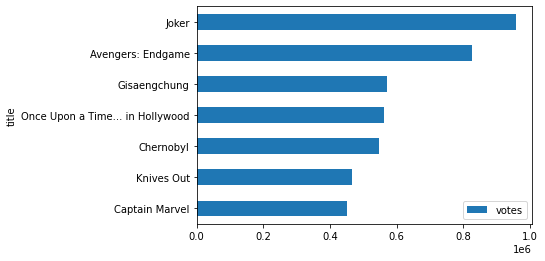

In [121]:
top7_popular_film.sort_values(by='votes', ascending=True).plot.barh(x='title', y='votes')

In [125]:
top7_highestrating_film = df[['title', 'imdb_rating']].sort_values(by='imdb_rating', ascending=False).head(7)

<AxesSubplot:ylabel='title'>

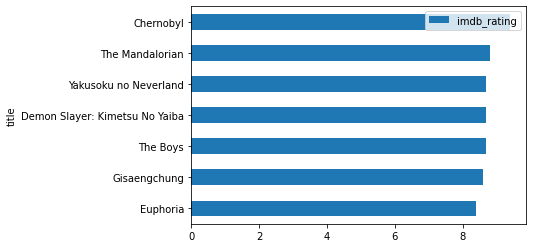

In [127]:
top7_highestrating_film.sort_values(by='imdb_rating', ascending=True).plot.barh(x='title', y='imdb_rating')

Berdasarkan plot yang didapatkan untuk film paling populer berdasarkan jumlah votes secara berurutan, yaitu Joker, Avengers: Endgame, Gisangcheung, Once Upon a Time... in Hollywood, Chernobyl, Knives Out, dan Captain Marvel. Selain itu untuk film dengan rating tertinggi secara berurutan, yaitu Chernobyl, The Mandalorian, Yakusoku no Neverland, Demon Slayer: Kimetsu No Yaiba, The  Boys, Gisaengchung, dan Euphoria. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.